<a href="https://colab.research.google.com/github/renatordasilva/smoke/blob/main/precipxaod_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import auth
import gspread
from google.auth import default

# Configurar estilo dos gráficos
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Autenticar no Google
auth.authenticate_user()
creds, _ = default()

# Conectar ao Google Sheets
gc = gspread.authorize(creds)

# Abrir a planilha pelo URL
#August
#spreadsheet_url = "https://docs.google.com/spreadsheets/d/1IDyR1JmrRn4tUrEABe2OvJb1_q2RTHyvrPcOh0u2dVk/edit?usp=sharing"
#September
#spreadsheet_url = "https://docs.google.com/spreadsheets/d/1ZRVffa3fwtfU__VAnrnFXTs3lZBCoNdSNfIM2jLOTqw/edit?usp=sharing"
#October
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1WLYcFa0YvHmT4yY6EsUaOqhTMa4wgXeVUdTmH5wHbLc/edit?usp=sharing"

sheet = gc.open_by_url(spreadsheet_url)

# Selecionar a primeira aba da planilha
worksheet = sheet.get_worksheet(0)

# Converter para DataFrame do pandas
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)

# Definir a primeira linha como cabeçalho
df.columns = df.iloc[0]
df = df.iloc[1:]

In [4]:
# Visualizar as primeiras linhas
print(df.head())

# Verificar informações sobre as colunas
print("\nInformações do DataFrame:")
print(df.info())

# Verificar estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

data_types = df.dtypes
print("\nTipos de dados das colunas:")
print(data_types)
print(df)

# Converter colunas numéricas para o tipo correto
df['Anomalia de precipitação'] = df.iloc[:, 0].astype(float)
df['Anomalia de Aerossóis'] = df.iloc[:, 1].astype(float)

#df['Aerossóis'] = pd.to_numeric(df['Aerossóis'])

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

0 anomalia aerossol anomalia precipitacao gpm  Anomalia de precipitação  \
1      0.2018050559                0.00006452                  0.201805   
2    -0.08128573165                -0.0160284                 -0.081286   
3    -0.03461134992                0.05618757                 -0.034611   
4     0.02564078437                0.06242685                  0.025641   
5    -0.08317731312               -0.01903558                 -0.083177   

0  Anomalia de Aerossóis  
1               0.000065  
2              -0.016028  
3               0.056188  
4               0.062427  
5              -0.019036  

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   anomalia aerossol          21 non-null     object 
 1   anomalia precipitacao gpm  21 non-null     object 
 2   Anomalia de precipitação   21

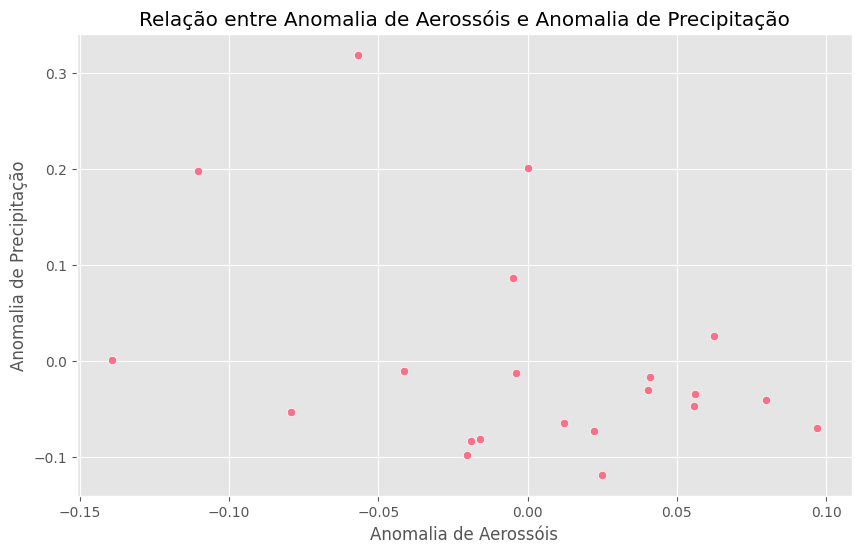


Matriz de correlação:
0                         Anomalia de Aerossóis  Anomalia de precipitação
0                                                                        
Anomalia de Aerossóis                  1.000000                 -0.374591
Anomalia de precipitação              -0.374591                  1.000000


In [6]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anomalia de Aerossóis', y='Anomalia de precipitação', data=df)
plt.title('Relação entre Anomalia de Aerossóis e Anomalia de Precipitação')
plt.xlabel('Anomalia de Aerossóis')
plt.ylabel('Anomalia de Precipitação')
plt.show()

# Matriz de correlação
correlation = df[['Anomalia de Aerossóis', 'Anomalia de precipitação']].corr()
print("\nMatriz de correlação:")
print(correlation)



Correlação de Pearson: -0.375, p-valor: 0.0943


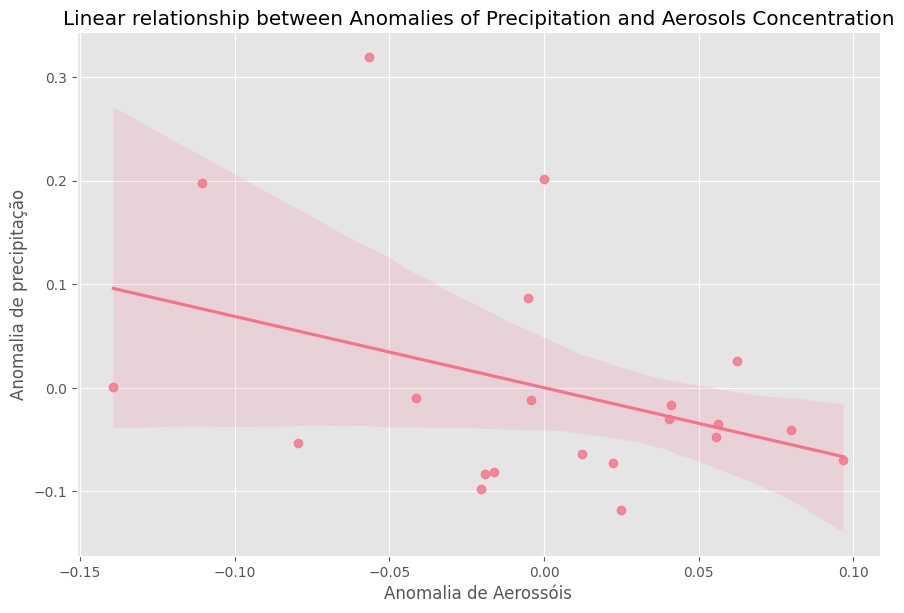

<Figure size 640x480 with 0 Axes>

In [7]:
from scipy import stats

# Teste de correlação de Pearson
pearson_corr, pearson_p = stats.pearsonr(df['Anomalia de Aerossóis'].dropna(), df['Anomalia de precipitação'].dropna())
print(f"\nCorrelação de Pearson: {pearson_corr:.3f}, p-valor: {pearson_p:.3g}")

# Regressão linear simples
sns.lmplot(x='Anomalia de Aerossóis', y='Anomalia de precipitação', data=df, height=6, aspect=1.5)
plt.title('Linear relationship between Anomalies of Precipitation and Aerosols Concentration')
plt.show()
plt.savefig('scatterplot1.png', dpi=300, bbox_inches='tight')

In [8]:
#
stats.spearmanr(df['Anomalia de Aerossóis'], df['Anomalia de precipitação'])

SignificanceResult(statistic=np.float64(-0.2155844155844156), pvalue=np.float64(0.34796751366229983))

In [10]:
# Salvar DataFrame processado
df.to_csv('dados_processados.csv', index=False)
